# 환경부 화학 물질안전원_화학물질 배출 및 이동량 정보
### 물질별 배출량이동정보
https://icis.me.go.kr/prtr/infoYard/openApi.do#

In [2]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
# http://icis.me.go.kr/openapi/service/prtr/getPrtrMttrList?pageNo=1&numOfRows=1&accsessKey=인증키

In [6]:
key = "Y29kbXM3OTJAbmF2ZXIuY29taXA4NDYzMA=="
year = 2020
page_no = 1
url = f"http://icis.me.go.kr/openapi/service/prtr/getPrtrMttrList?pageNo={page_no}&accessKey={key}&searchYear={year}"

In [7]:
print(url)

http://icis.me.go.kr/openapi/service/prtr/getPrtrMttrList?pageNo=1&accessKey=Y29kbXM3OTJAbmF2ZXIuY29taXA4NDYzMA==&searchYear=2020


2020년 물질별 배출량이동정보

In [53]:
df = pd.read_xml(url, xpath='.//item')
df.head(3)

,air,BSum,casNo,companyId,companyName,ISum,jaga,mttrName,pyegi,pyesoo,rn,soil,water
0,"21,033","21,033",NA-(주24),1250145083732164601,SK하이닉스(주),0,0,과불화탄소,0,0,1,0,0
1,"7,687","7,687",007664-41-7,1250145083732164601,SK하이닉스(주),"262,974",0,암모니아(수산화 암모늄(CAS No. 1336-21-6) 포함),"262,974",0,2,0,0
2,"3,309","3,309",000064-19-7,1250145083732164601,SK하이닉스(주),"21,574",0,아세트산,"21,574",0,3,0,0


In [5]:
df.shape

(10, 13)

In [6]:
df.columns

Index(['air', 'BSum', 'casNo', 'companyId', 'companyName', 'ISum', 'jaga',
       'mttrName', 'pyegi', 'pyesoo', 'rn', 'soil', 'water'],
      dtype='object')

['air : 대기배출량', 'BSum : 배출량(kg/년)', 'casNo : casNo', 'companyId : 업체아이디', 'companyName : 업체명', 'ISum : 이동량(kg/년)', 'jaga : 자가매립량',
       'mttrName : 물질명', 'pyegi : 폐기물이동량', 'pyesoo : 폐수이동량', 'rn : 번호', 'soil : 토양배출량', 'water : 수계배출량']

# 데이터 스크래핑

호출된 url에 들어가면 totalCount에 13550 </br>
한번에 불러오는 행 10 </br>
페이지 1355페이지

In [69]:
import time
from tqdm import trange

In [70]:
# key = "Y29kbXM3OTJAbmF2ZXIuY29taXA4NDYzMA=="
# year = 2020
# page_no = 1
# url = f"http://icis.me.go.kr/openapi/service/prtr/getPrtrMttrList?pageNo={page_no}&accessKey={key}&searchYear={year}"


# 데이터를 저장할 빈 변수 선언
item_list = []

for num in trange(1, 1356):
    key = "Y29kbXM3OTJAbmF2ZXIuY29taXA4NDYzMA=="
    year = 2020
    page_no = num
    url = f"http://icis.me.go.kr/openapi/service/prtr/getPrtrMttrList?pageNo={page_no}&accessKey={key}&searchYear={year}"
    df_item = pd.read_xml(url, xpath='.//item')
    item_list.append(df_item)
    time.sleep(0.5)
    page_no = page_no + num


100%|████████████████████████████████████████████████████████████████████████████| 1355/1355 [1:19:22<00:00,  3.51s/it]


In [72]:
df_m = pd.concat(item_list)
df_m.shape

(13550, 13)

In [4]:
file_name = "환경부 화학 물질안전원_화학물질 배출 및 이동량 정보.csv"

In [75]:
df_m.to_csv(file_name, index=False)

In [10]:
df_tmp = pd.read_csv(file_name)
df_tmp.head()

,air,BSum,casNo,companyId,companyName,ISum,jaga,mttrName,pyegi,pyesoo,rn,soil,water
0,"21,033","21,033",NA-(주24),1250145083732164601,SK하이닉스(주),0,0,과불화탄소,0,0,1,0,0
1,"7,687","7,687",007664-41-7,1250145083732164601,SK하이닉스(주),"262,974",0,암모니아(수산화 암모늄(CAS No. 1336-21-6) 포함),"262,974",0,2,0,0
2,"3,309","3,309",000064-19-7,1250145083732164601,SK하이닉스(주),"21,574",0,아세트산,"21,574",0,3,0,0
3,"2,851","2,851",007647-01-0,1250145083732164601,SK하이닉스(주),0,0,염화 수소,0,0,4,0,0
4,"2,130","2,130",000067-63-0,1250145083732164601,SK하이닉스(주),"924,380",0,2-프로판올,"924,380",0,5,0,0


In [11]:
df_tmp.shape

(13550, 13)

In [14]:
df_tmp['air'] = df_tmp['air'].apply(lambda x : x.replace(',',''))
df_tmp['BSum'] = df_tmp['BSum'].apply(lambda x : x.replace(',',''))
df_tmp['ISum'] = df_tmp['ISum'].apply(lambda x : x.replace(',',''))
df_tmp['pyegi'] = df_tmp['pyegi'].apply(lambda x : x.replace(',',''))
df_tmp['pyesoo'] = df_tmp['pyesoo'].apply(lambda x : x.replace(',',''))
df_tmp['water'] = df_tmp['water'].apply(lambda x : x.replace(',',''))

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   air          13550 non-null  object
 1   BSum         13550 non-null  object
 2   casNo        13550 non-null  object
 3   companyId    13550 non-null  int64 
 4   companyName  13550 non-null  object
 5   ISum         13550 non-null  object
 6   jaga         13550 non-null  object
 7   mttrName     13550 non-null  object
 8   pyegi        13550 non-null  object
 9   pyesoo       13550 non-null  object
 10  rn           13550 non-null  int64 
 11  soil         13550 non-null  int64 
 12  water        13550 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.3+ MB


In [17]:
df_tmp = df_tmp.astype({'air':'float', 'BSum':'float','ISum':'float','pyegi':'float','pyesoo':'float','water':'float'})

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   air          13550 non-null  float64
 1   BSum         13550 non-null  float64
 2   casNo        13550 non-null  object 
 3   companyId    13550 non-null  int64  
 4   companyName  13550 non-null  object 
 5   ISum         13550 non-null  float64
 6   jaga         13550 non-null  object 
 7   mttrName     13550 non-null  object 
 8   pyegi        13550 non-null  float64
 9   pyesoo       13550 non-null  float64
 10  rn           13550 non-null  int64  
 11  soil         13550 non-null  int64  
 12  water        13550 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.3+ MB


In [18]:
df_tmp.describe()

,air,BSum,companyId,ISum,pyegi,pyesoo,rn,soil,water
count,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,13550.000000,13550.0,13550.000000
mean,4.423360e+03,4.443296e+03,1.511895e+17,8.386209e+04,7.729162e+04,6.570476e+03,6775.500000,0.0,19.936531
std,3.837033e+04,3.837109e+04,4.069062e+17,1.794475e+06,1.776573e+06,1.471150e+05,3911.692409,0.0,458.281065
min,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.0,0.000000
25%,0.000000e+00,0.000000e+00,1.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3388.250000,0.0,0.000000
50%,8.000000e+00,9.000000e+00,8.012000e+03,8.000000e+00,0.000000e+00,0.000000e+00,6775.500000,0.0,0.000000
75%,3.740000e+02,3.890000e+02,2.003282e+06,4.763250e+03,2.436250e+03,0.000000e+00,10162.750000,0.0,0.000000
max,2.408641e+06,2.408641e+06,1.250145e+18,1.282373e+08,1.282373e+08,1.115927e+07,13550.000000,0.0,23551.000000


In [22]:
#데이터 타입 수정 후 저장
file_name = "환경부 화학 물질안전원_화학물질 배출 및 이동량 정보.csv"
df_tmp.to_csv(file_name, index=False)

In [5]:
df = pd.read_csv(file_name)
df.head()

,air,BSum,casNo,companyId,companyName,ISum,jaga,mttrName,pyegi,pyesoo,rn,soil,water
0,21033.0,21033.0,NA-(주24),1250145083732164601,SK하이닉스(주),0.0,0,과불화탄소,0.0,0.0,1,0,0.0
1,7687.0,7687.0,007664-41-7,1250145083732164601,SK하이닉스(주),262974.0,0,암모니아(수산화 암모늄(CAS No. 1336-21-6) 포함),262974.0,0.0,2,0,0.0
2,3309.0,3309.0,000064-19-7,1250145083732164601,SK하이닉스(주),21574.0,0,아세트산,21574.0,0.0,3,0,0.0
3,2851.0,2851.0,007647-01-0,1250145083732164601,SK하이닉스(주),0.0,0,염화 수소,0.0,0.0,4,0,0.0
4,2130.0,2130.0,000067-63-0,1250145083732164601,SK하이닉스(주),924380.0,0,2-프로판올,924380.0,0.0,5,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   air          13550 non-null  float64
 1   BSum         13550 non-null  float64
 2   casNo        13550 non-null  object 
 3   companyId    13550 non-null  int64  
 4   companyName  13550 non-null  object 
 5   ISum         13550 non-null  float64
 6   jaga         13550 non-null  object 
 7   mttrName     13550 non-null  object 
 8   pyegi        13550 non-null  float64
 9   pyesoo       13550 non-null  float64
 10  rn           13550 non-null  int64  
 11  soil         13550 non-null  int64  
 12  water        13550 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

,air,BSum,companyId,ISum,pyegi,pyesoo,rn,soil,water
count,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,1.355000e+04,13550.000000,13550.0,13550.000000
mean,4.423360e+03,4.443296e+03,1.511895e+17,8.386209e+04,7.729162e+04,6.570476e+03,6775.500000,0.0,19.936531
std,3.837033e+04,3.837109e+04,4.069062e+17,1.794475e+06,1.776573e+06,1.471150e+05,3911.692409,0.0,458.281065
min,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.0,0.000000
25%,0.000000e+00,0.000000e+00,1.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3388.250000,0.0,0.000000
50%,8.000000e+00,9.000000e+00,8.012000e+03,8.000000e+00,0.000000e+00,0.000000e+00,6775.500000,0.0,0.000000
75%,3.740000e+02,3.890000e+02,2.003282e+06,4.763250e+03,2.436250e+03,0.000000e+00,10162.750000,0.0,0.000000
max,2.408641e+06,2.408641e+06,1.250145e+18,1.282373e+08,1.282373e+08,1.115927e+07,13550.000000,0.0,23551.000000


<AxesSubplot:>

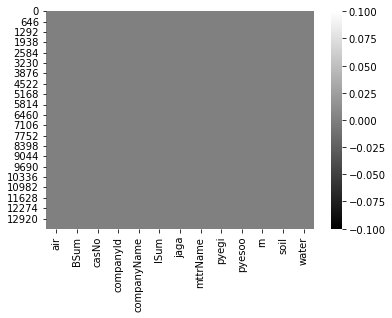

In [8]:
sns.heatmap(df.isnull(), cmap='gray')

## 그래프를 그려보자

['air : 대기배출량', 'BSum : 배출량(kg/년)', 'casNo : casNo', 'companyId : 업체아이디', 'companyName : 업체명', 'ISum : 이동량(kg/년)', 'jaga : 자가매립량', 'mttrName : 물질명', 'pyegi : 폐기물이동량', 'pyesoo : 폐수이동량', 'rn : 번호', 'soil : 토양배출량', 'water : 수계배출량']

<AxesSubplot:xlabel='mttrName', ylabel='count'>

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50516 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44284 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49481 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48052 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47568 missing from current font.
  f

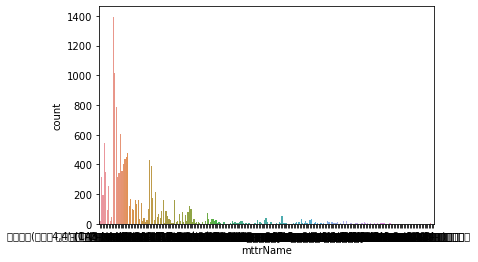

In [40]:
# countplot 으로 mttrName 빈도수 시각화 하기
sns.countplot(data=df, x="mttrName")

물질종류가 많아서 막대그래프를 이용한 시각화는 별로임

<AxesSubplot:xlabel='companyName', ylabel='BSum'>

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50472 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52376 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52377 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50780 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48513 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45940 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44428 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52740 missing from current

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49481 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 55141 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47792 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47200 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45909 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50612 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52377 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54889 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47212 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48727 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49368 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50780 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53489 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48307 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52873 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47561 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47116 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52293 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49388 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  f

C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53428 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46304 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missing from current font.
  f

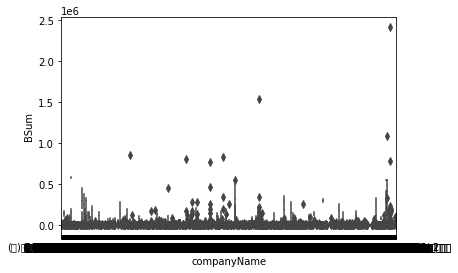

In [24]:
sns.boxplot(data=df, x='companyName', y='BSum')

<AxesSubplot:xlabel='BSum'>

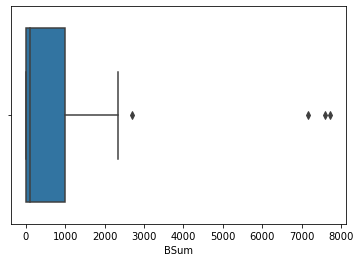

In [17]:
sns.boxplot(data = df[df['companyName'] == '(주)LG화학'], x='BSum')

<AxesSubplot:xlabel='BSum'>

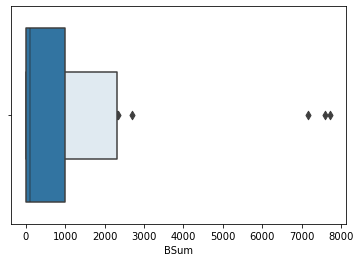

In [18]:
sns.boxenplot(data = df[df['companyName'] == '(주)LG화학'], x='BSum')

<AxesSubplot:xlabel='BSum'>

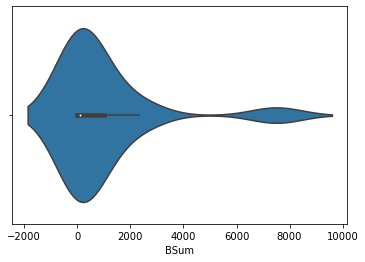

In [19]:
sns.violinplot(data = df[df['companyName'] == '(주)LG화학'], x='BSum')

<AxesSubplot:xlabel='BSum'>

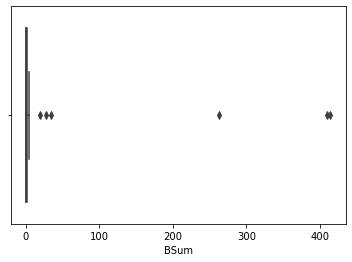

In [20]:
sns.boxplot(data = df[df['companyName'] == '(유)피피지코리아'], x='BSum')

<AxesSubplot:xlabel='BSum'>

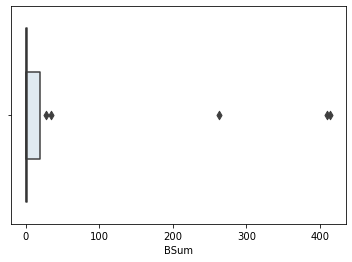

In [21]:
sns.boxenplot(data = df[df['companyName'] == '(유)피피지코리아'], x='BSum')

<AxesSubplot:xlabel='BSum'>

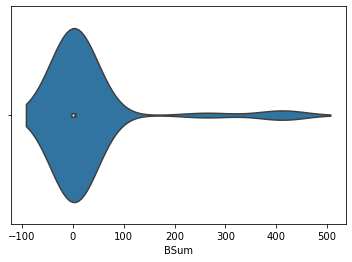

In [23]:
sns.violinplot(data = df[df['companyName'] == '(유)피피지코리아'], x='BSum')